<a href="https://colab.research.google.com/github/SanyamSwami123/make-more-series-andrej-karpathy/blob/main/2_bigram_language_model_optimised_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bigram: one character predicts the next one with a lookup table of counts

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [4]:
words = open('names.txt', 'r').read().splitlines()

In [5]:
N = torch.zeros((27,27), dtype= torch.int32) # we have 26 unique character and 2 special character <S> and <E>, so row=28, col =28

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i ,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [7]:
# creating the training set of biagram (xs (inputs), ys (ouput/labels))
xs, ys= [], []
for w  in words[:1]:
  chs = ['.'] + list(w)+['.']
  for ch1, ch2 in zip(chs,  chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [8]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [10]:
# neural network approach
x_enc = F.one_hot(xs, num_classes=27).float()

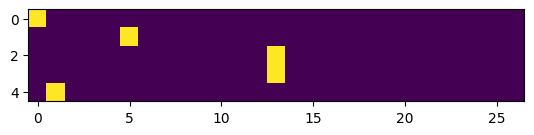

In [11]:
plt.imshow(x_enc)

In [12]:
x_enc.dtype

torch.float32

In [16]:
w = torch.randn((27,27)) # matrix multiplication (5, 27) @ (27, 27) --> (5,27)

In [17]:
logits = (x_enc @  w) # log counts
counts = logits.exp() # equivalent to the N matrix #exp in math see the graph (converting the negative number towards positive but it will never be below zero and positives to more positive).
prob = counts /counts.sum(1, keepdims = True) # probabilities for next character
prob #all value sum =1

tensor([[0.0063, 0.0073, 0.0039, 0.0219, 0.0056, 0.0029, 0.0250, 0.0092, 0.4952,
         0.0031, 0.0180, 0.0448, 0.0638, 0.0025, 0.0207, 0.0187, 0.0093, 0.0172,
         0.0190, 0.0067, 0.0096, 0.0143, 0.0103, 0.0186, 0.0950, 0.0413, 0.0100],
        [0.0059, 0.0106, 0.1204, 0.0769, 0.0014, 0.0113, 0.0193, 0.0472, 0.0056,
         0.0677, 0.0301, 0.0032, 0.0110, 0.0244, 0.0484, 0.0130, 0.0066, 0.0254,
         0.1847, 0.0299, 0.0910, 0.0142, 0.0219, 0.0065, 0.0127, 0.0400, 0.0706],
        [0.0060, 0.0178, 0.0295, 0.0222, 0.0134, 0.0285, 0.0385, 0.1091, 0.0167,
         0.0488, 0.0474, 0.0020, 0.0242, 0.1412, 0.0225, 0.0026, 0.0163, 0.0174,
         0.0395, 0.0541, 0.0486, 0.0090, 0.0952, 0.0083, 0.0235, 0.0888, 0.0292],
        [0.0060, 0.0178, 0.0295, 0.0222, 0.0134, 0.0285, 0.0385, 0.1091, 0.0167,
         0.0488, 0.0474, 0.0020, 0.0242, 0.1412, 0.0225, 0.0026, 0.0163, 0.0174,
         0.0395, 0.0541, 0.0486, 0.0090, 0.0952, 0.0083, 0.0235, 0.0888, 0.0292],
        [0.0098, 0.0406,

In [21]:
prob[1].sum() # each row sum is prob 1

tensor(1.)

In [22]:
prob[0]

tensor([0.0063, 0.0073, 0.0039, 0.0219, 0.0056, 0.0029, 0.0250, 0.0092, 0.4952,
        0.0031, 0.0180, 0.0448, 0.0638, 0.0025, 0.0207, 0.0187, 0.0093, 0.0172,
        0.0190, 0.0067, 0.0096, 0.0143, 0.0103, 0.0186, 0.0950, 0.0413, 0.0100])

In [23]:
# randomly intialize 27 neurons weight, each neuron receives 27 inputs
g = torch.Generator().manual_seed(42)
w = torch.randn((27,27), generator=g)

In [24]:
x_enc = F.one_hot(xs, num_classes=27).float() # input to the network: one hot encoding
logits = x_enc @ w # output pre-softmax, predict log-counts
counts = logits.exp() # counts, equivalent to N
prob = counts / counts.sum(1, keepdims=True) #probabilities for next character
# btw: the last  2lines here are together called softmax (softmax always puts number greater than 0)
# our neural network here is:
# linear layer
#    |
#    \/
# softmax layer

In [25]:
nlls = torch.zeros(5) # negative log likelihood note: nll directly proportional to the loss.
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]} {itos[y]} (indexes {x}, {y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', prob[i])
  print('label (actual next character):', y)
  p = prob[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: . e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.1230, 0.0793, 0.0441, 0.0022, 0.0353, 0.0052, 0.0172, 0.0036, 0.0084,
        0.0932, 0.0121, 0.0044, 0.0087, 0.0102, 0.0083, 0.0384, 0.0926, 0.0153,
        0.0109, 0.0278, 0.0084, 0.0527, 0.0399, 0.0962, 0.0644, 0.0655, 0.0330])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.005211981479078531
log likelihood: -5.256795406341553
negative log likelihood: 5.256795406341553
--------
bigram example 2: e m (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0396, 0.0698, 0.0227, 0.0037, 0.0562, 0.0153, 0.0626, 0.0112, 0.0421,
        0.0084, 0.0581, 0.1125, 0.0951, 0.0292, 0.0181, 0.0107, 0.0247, 0.0316,
        0.0586, 0.0140, 0.1109, 0.0019, 0.0147, 0.0067, 0.0502, 0.0033, 0.0280])
label (actual next character): 13
probability assigned by the net to the the correct characte

# optimised code

In [47]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [48]:
words = open('names.txt', 'r').read().splitlines()

In [49]:
N = torch.zeros((27,27), dtype= torch.int32) # we have 26 unique character and 2 special character <S> and <E>, so row=28, col =28

In [50]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i ,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [51]:
# create the dataset (xs (inputs), ys (ouput/labels))
xs, ys= [], []
for w  in words:
  chs = ['.'] + list(w)+['.']
  for ch1, ch2 in zip(chs,  chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
# randomly intialize 27 neurons weight, each neuron receives 27 inputs
g = torch.Generator().manual_seed(42)
w = torch.randn((27,27), generator=g, requires_grad=True) # requires the grad to be true so that the gradient can be calculated and can be tracked

number of examples:  228146


In [52]:
# gradient decent/ training
for k in range(100): # 100 iterations (epochs)

  ## forward pass
  x_enc = F.one_hot(xs, num_classes=27).float() # input to the network: one hot encoding
  logits = x_enc @ w # output pre-softmax, predict log-counts
  counts = logits.exp() # counts, equivalent to N
  prob = counts / counts.sum(1, keepdims=True)
  loss = -prob[torch.arange(num), ys].log().mean() + 0.01 *(w**2).mean() # (average negative log likelihood + regularizationie) i.e. loss
  print(loss.item())

  ## backward pass
  w.grad = None # set to zero the gradient
  loss.backward()

#update/step parameters/weights
# for p in w.parameters():
  w.data += -50 * w.grad # 0.1 is learning_rate

3.706477165222168
3.373866081237793
3.1580393314361572
3.015209197998047
2.9186456203460693
2.847991466522217
2.7949209213256836
2.754241466522217
2.722402334213257
2.6969125270843506
2.6760470867156982
2.6586241722106934
2.643829345703125
2.6310932636260986
2.6200039386749268
2.610258102416992
2.6016242504119873
2.593924045562744
2.58701491355896
2.580784320831299
2.575138568878174
2.5700018405914307
2.565310478210449
2.5610110759735107
2.557058334350586
2.5534133911132812
2.5500428676605225
2.546917676925659
2.5440127849578857
2.541306734085083
2.5387794971466064
2.536414861679077
2.534198045730591
2.5321154594421387
2.530156373977661
2.5283100605010986
2.5265681743621826
2.524921417236328
2.5233635902404785
2.521888017654419
2.5204882621765137
2.5191593170166016
2.5178964138031006
2.516695499420166
2.515552043914795
2.514462947845459
2.5134246349334717
2.5124330520629883
2.511486768722534
2.510582208633423
2.5097174644470215
2.508889675140381
2.5080971717834473
2.507338285446167
2.5

In [54]:
# finally simple from the 'neural network' model
g = torch.Generator().manual_seed(42)

for i in range(5):
  out = []
  ix = 0
  while True:
    # -------
    # now:
    x_enc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = x_enc @ w # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(out)
  print(''.join(out))

['y', 'a', '.']
ya.
['s', 'y', 'a', 'h', 'a', 'v', 'i', 'l', 'i', 'n', '.']
syahavilin.
['d', 'l', 'e', 'e', 'k', 'a', 'h', 'm', 'a', 'n', 'g', 'o', 'n', 'y', 'a', '.']
dleekahmangonya.
['t', 'r', 'y', 'a', 'h', 'e', '.']
tryahe.
['c', 'h', 'e', 'n', '.']
chen.


# conclusion: we have covered bigram character level language model.